In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/mc2bldgdataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mc2bldgdataset/data.csv


In [2]:
# import the data
dataset = pd.read_csv('/kaggle/input/mc2bldgdataset/data.csv')
dataset = dataset.rename(columns=lambda x: x.strip())
dataset.describe()

,Drybulb Temperature,Water Heater Tank Temperature,Water Heater Gas Rate,Supply Side Inlet Mass Flow Rate,Supply Side Inlet Temperature,Supply Side Outlet Temperature,HVAC Electric Demand Power,Total Electric Demand Power,Loop Temp Schedule,Water Heater Setpoint,...,F_3_Z_10 SUPPLY INLET Mass Flow Rate,F_3_Z_11A RETURN OUTLET CO2 Concentration,F_3_Z_11A SUPPLY INLET Temperature,F_3_Z_11A SUPPLY INLET Mass Flow Rate,F_3_Z_11B RETURN OUTLET CO2 Concentration,F_3_Z_11B SUPPLY INLET Temperature,F_3_Z_11B SUPPLY INLET Mass Flow Rate,F_3_Z_11C RETURN OUTLET CO2 Concentration,F_3_Z_11C SUPPLY INLET Temperature,F_3_Z_11C SUPPLY INLET Mass Flow Rate
count,4032.000000,4032.000000,4032.000000,4.032000e+03,4032.000000,4032.000000,4032.000000,4032.000000,4032.0,4032.0,...,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000
mean,25.206895,59.124763,7725.178544,3.179000e-01,54.318156,59.124763,52555.520503,142274.890509,60.0,60.0,...,0.104051,579.061553,13.903618,0.192986,523.619062,13.506374,0.393175,578.825133,13.504765,0.327561
std,2.064292,0.582666,22591.087212,5.551804e-17,5.350256,0.582666,32495.398847,41000.395221,0.0,0.0,...,0.046793,209.961457,2.554892,0.075883,141.293645,1.564518,0.124577,211.989216,1.784090,0.113472
min,21.100000,58.025300,0.000000,3.179000e-01,42.115000,58.025300,9301.062100,73811.181200,60.0,60.0,...,0.027800,401.509900,12.280600,0.048700,125.281600,12.280600,0.092400,401.503900,12.280600,0.079500
25%,23.633300,58.647900,0.000000,3.179000e-01,49.235400,58.647900,25316.601250,110688.755725,60.0,60.0,...,0.052175,417.273000,12.800000,0.182100,411.083475,12.799900,0.427325,416.701625,12.799900,0.327200
50%,24.733300,59.101850,0.000000,3.179000e-01,56.475900,59.101850,48191.688300,138985.708850,60.0,60.0,...,0.139100,499.316100,12.801200,0.243300,484.762500,12.801100,0.462100,497.281000,12.801100,0.397700
75%,27.000000,59.592975,0.000000,3.179000e-01,58.888000,59.592975,57611.030025,181530.125275,60.0,60.0,...,0.139100,652.913425,14.706700,0.243300,617.740800,14.212400,0.462100,653.224100,13.987625,0.397700
max,29.400000,60.747300,89340.640800,3.179000e-01,60.792700,60.747300,242075.665000,341392.985000,60.0,60.0,...,0.139100,1294.654000,39.978000,0.243300,1202.600300,31.342500,0.462100,1309.875600,39.975800,0.397700


In [3]:
features =[
  "Date/Time",
  "F_2_Z_2: Lights Power",
  "F_2_Z_2: Equipment Power",
  "F_2_Z_2: Thermostat Temp",
  "F_2_Z_2: Thermostat Cooling Setpoint",
  "F_2_Z_2: Thermostat Heating Setpoint",
  "F_2_Z_2 VAV REHEAT Damper Position",
  "F_2_Z_2 REHEAT COIL Power",
  "F_2_Z_2 RETURN OUTLET CO2 Concentration",
  "F_2_Z_2 SUPPLY INLET Temperature",
  "F_2_Z_2 SUPPLY INLET Mass Flow Rate"
]

dataset = dataset[features]
date_column = dataset.apply(lambda row: row["Date/Time"].split()[0], axis = 1)
time_column = dataset.apply(lambda row: row["Date/Time"].split()[1], axis = 1)

dataset.insert(0, 'Date', date_column)
dataset.insert(1, 'Time', time_column)

dataset = dataset.drop('Date/Time', axis=1)

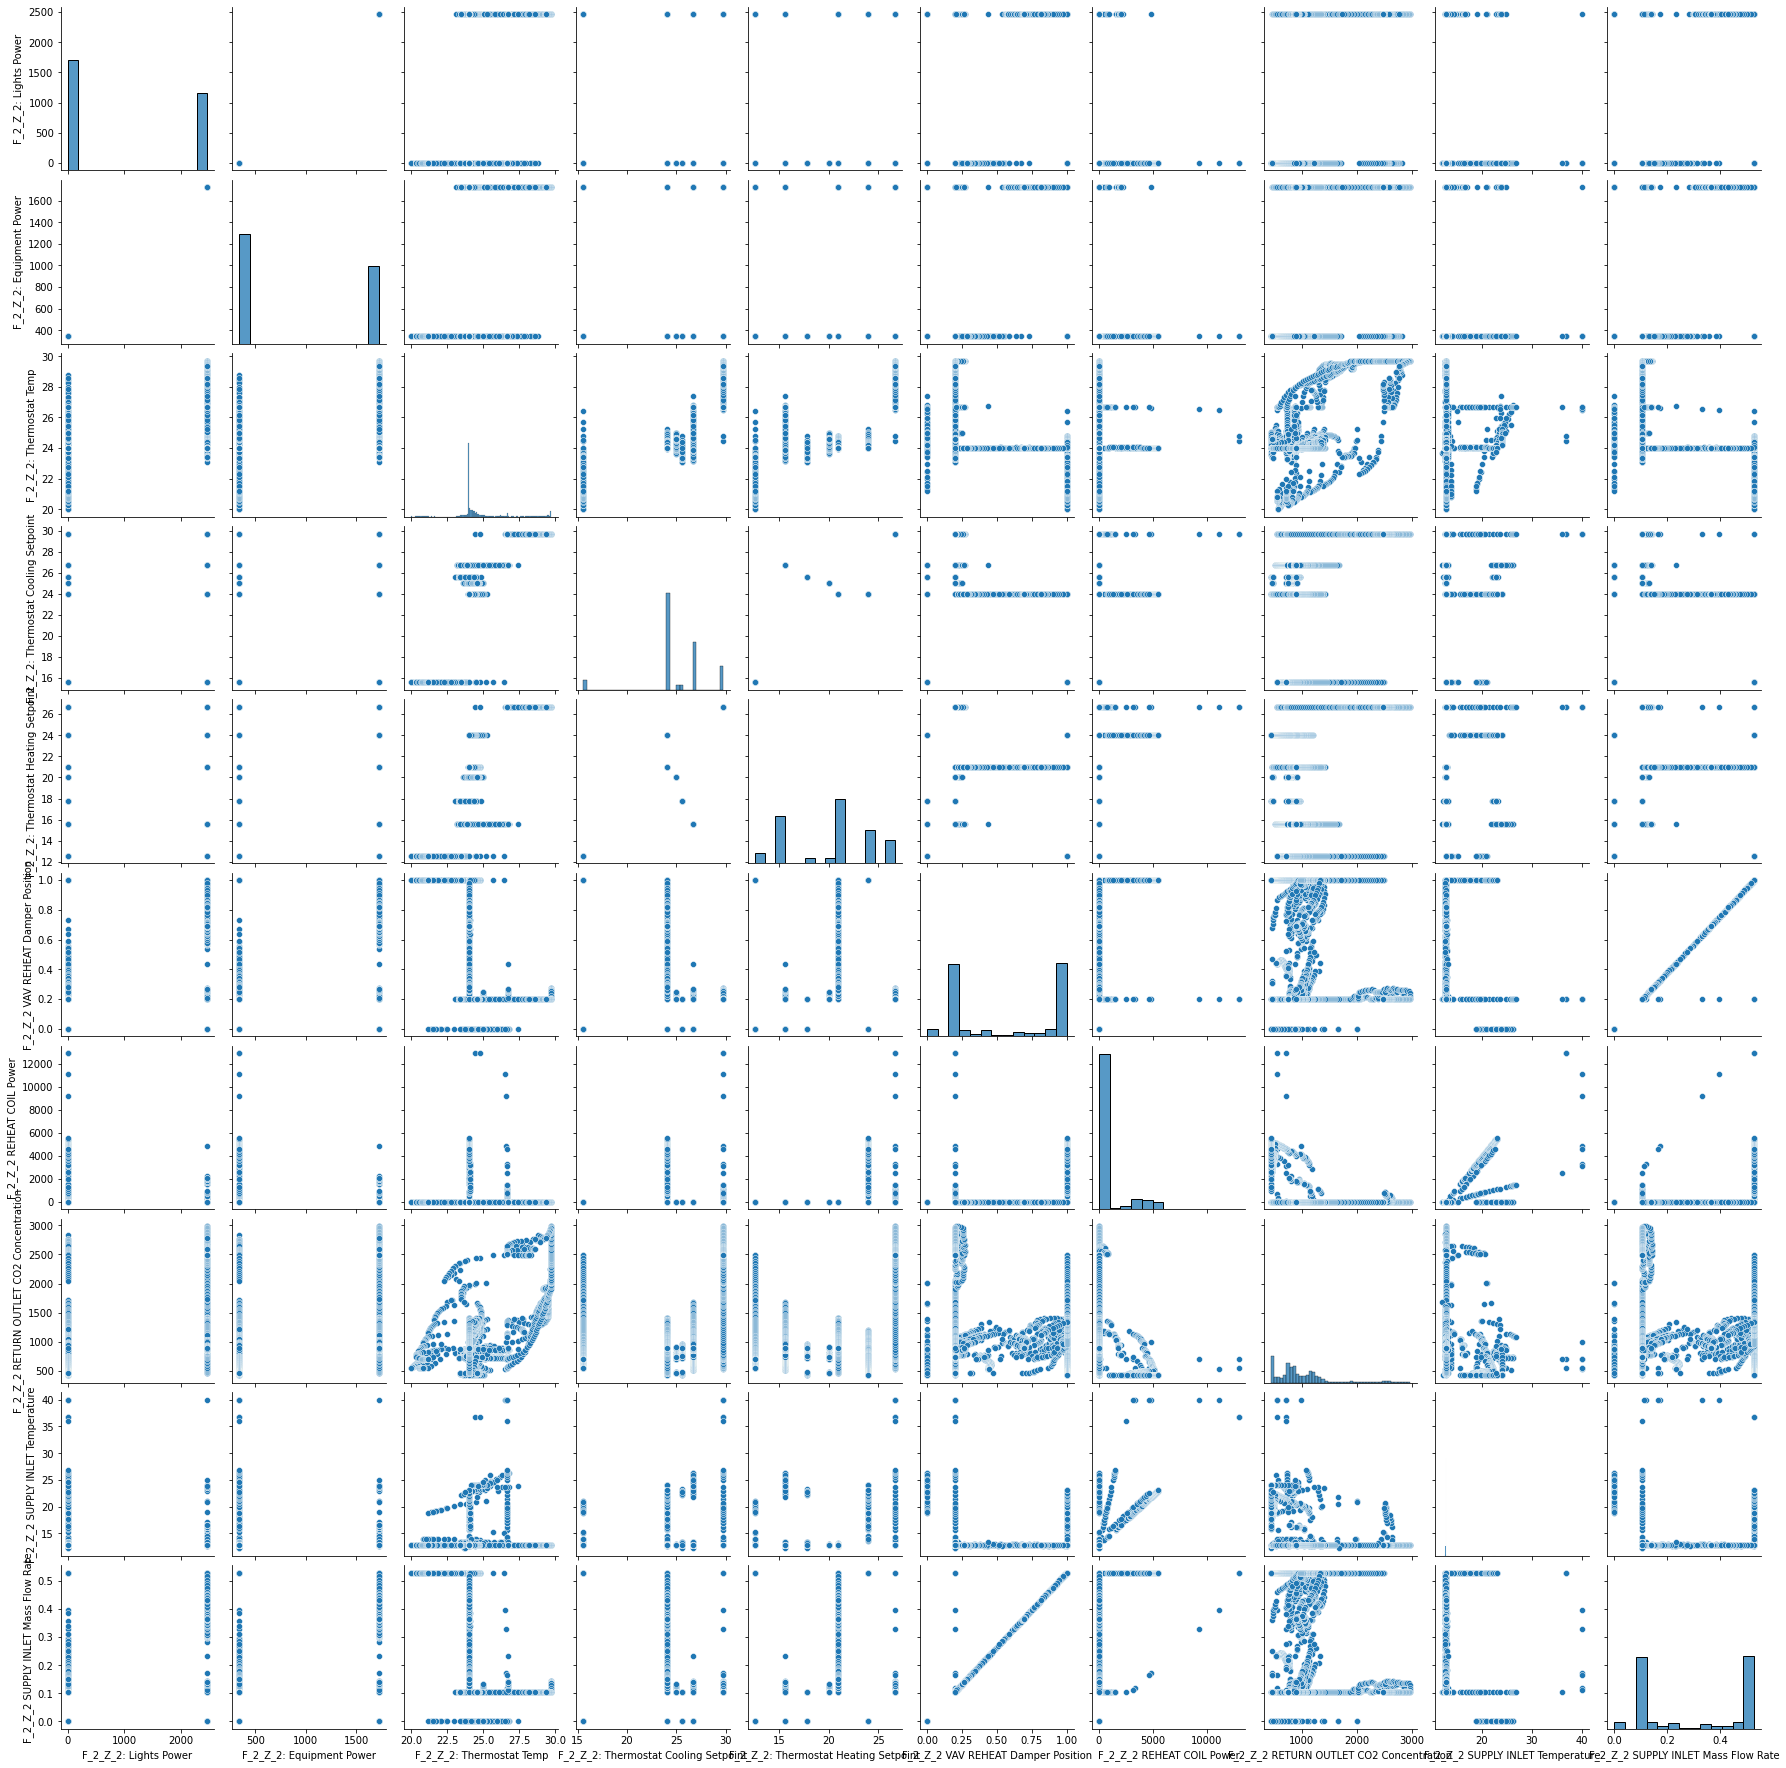

In [4]:
sns.pairplot(dataset)

In [5]:
weekDays = []

for group, dataframe in dataset.groupby('Date'):   
  weekDays.append(dataframe)   
  dataframe.to_csv(f'{group}.csv', index=False)

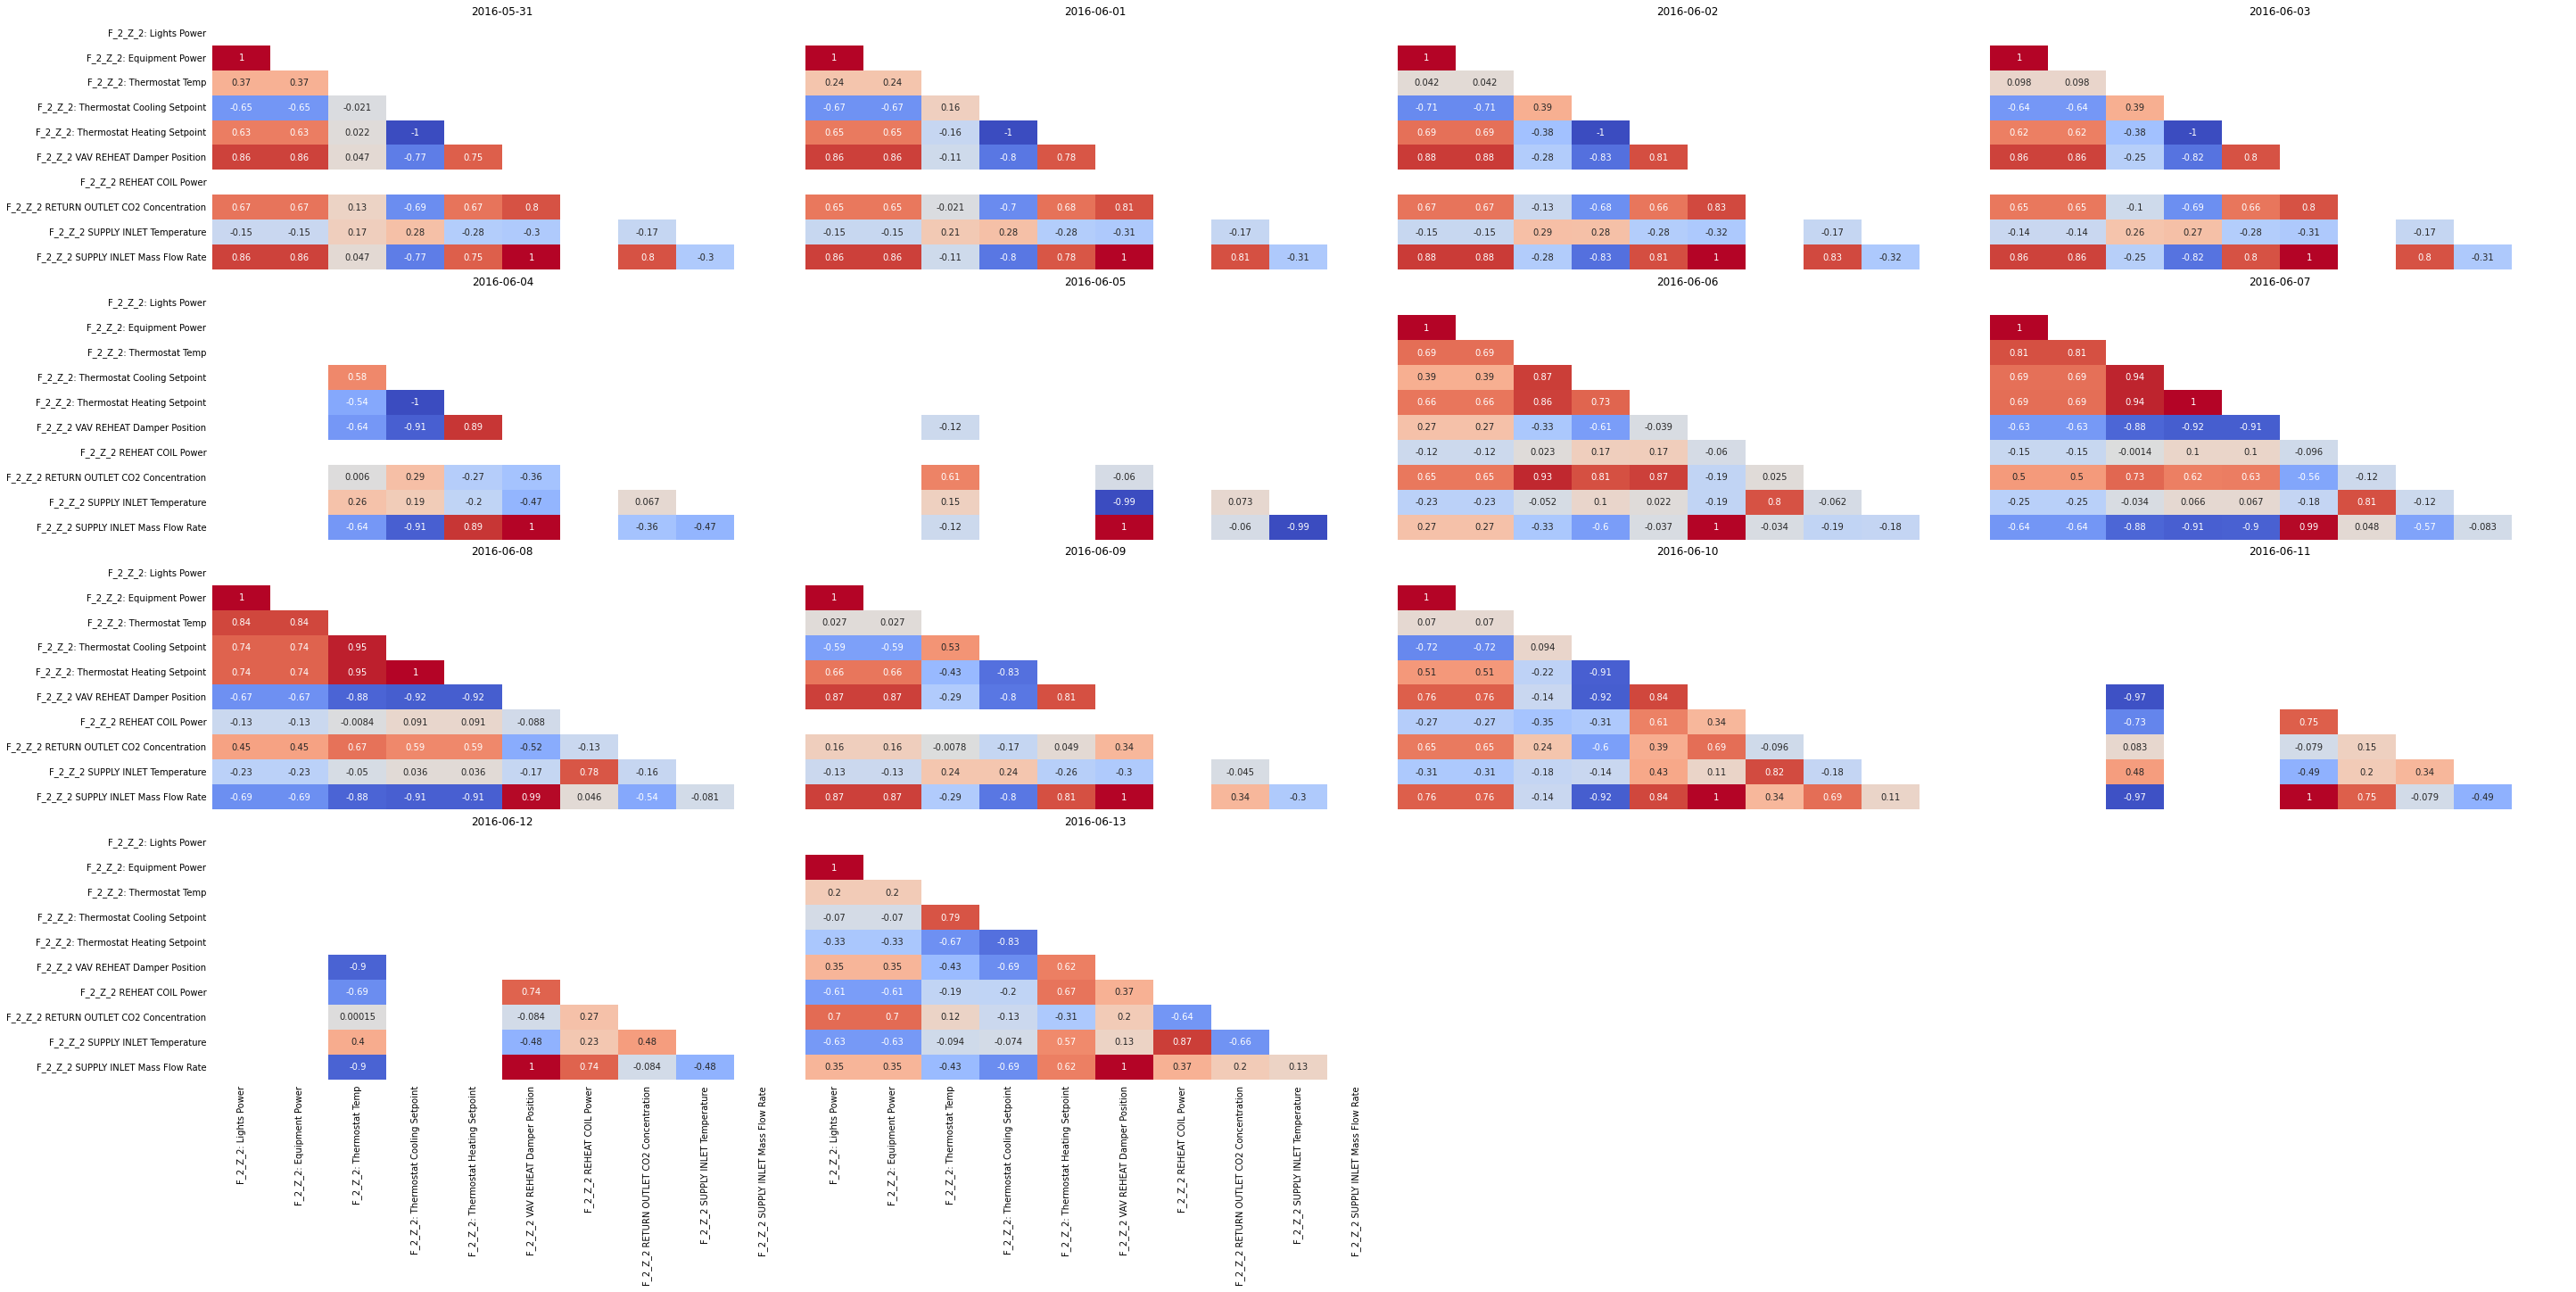

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from IPython.display import Image

def heatmap(df, ax, title):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr))
  sns.heatmap(
    corr, 
    cbar=False, 
    mask=mask,
    ax=ax, 
    annot=True, 
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
  )

  ax.title.set_text(f"{title}")
  ax.tick_params(
    top=False,
    bottom=False,
    left=False,
    right=False,
  )

fig, ax = plt.subplots(
  nrows=4, 
  ncols=4, 
  sharey=True, 
  sharex=True, 
  figsize=(40, 20), 
  constrained_layout=True
)

axes = ax.flatten()

for i in range(len(weekDays)):
  df = weekDays[i]
  ax = axes[i]
  heatmap(df, ax, df.Date.iat[0])

for ax in axes.flat[len(weekDays):]:
    ax.remove()

plt.savefig("correlation-heatmaps.png", bbox_inches="tight")
plt.close()
img = Image("correlation-heatmaps.png", width=2000)
img

In [7]:
mean_values = []

for i, df in enumerate(weekDays):
  mean_values.append([df.Date.iat[0], *df.mean().tolist()])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [8]:
new_dataframe = pd.DataFrame(mean_values, columns=[ 
  "Date",
  "F_2_Z_2: Lights Power",
  "F_2_Z_2: Equipment Power",
  "F_2_Z_2: Thermostat Temp",
  "F_2_Z_2: Thermostat Heating Setpoint",
  "F_2_Z_2: Thermostat Cooling Setpoint",
  "F_2_Z_2 VAV REHEAT Damper Position",
  "F_2_Z_2 REHEAT COIL Power",
  "F_2_Z_2 RETURN OUTLET CO2 Concentration",
  "F_2_Z_2 SUPPLY INLET Temperature",
  "F_2_Z_2 SUPPLY INLET Mass Flow Rate",
])

new_dataframe.to_csv('new_dataframe.csv', index=False)


# Rearrange order
new_dataframe = new_dataframe.reindex(columns=[ 
  "Date",
  "F_2_Z_2 RETURN OUTLET CO2 Concentration",
  "F_2_Z_2: Thermostat Temp",
  "F_2_Z_2 SUPPLY INLET Mass Flow Rate",
  "F_2_Z_2 VAV REHEAT Damper Position",  
  "F_2_Z_2: Thermostat Heating Setpoint",
  "F_2_Z_2: Thermostat Cooling Setpoint",
  "F_2_Z_2: Equipment Power", 
  "F_2_Z_2 REHEAT COIL Power",
  "F_2_Z_2: Lights Power",
  "F_2_Z_2 SUPPLY INLET Temperature", 
])

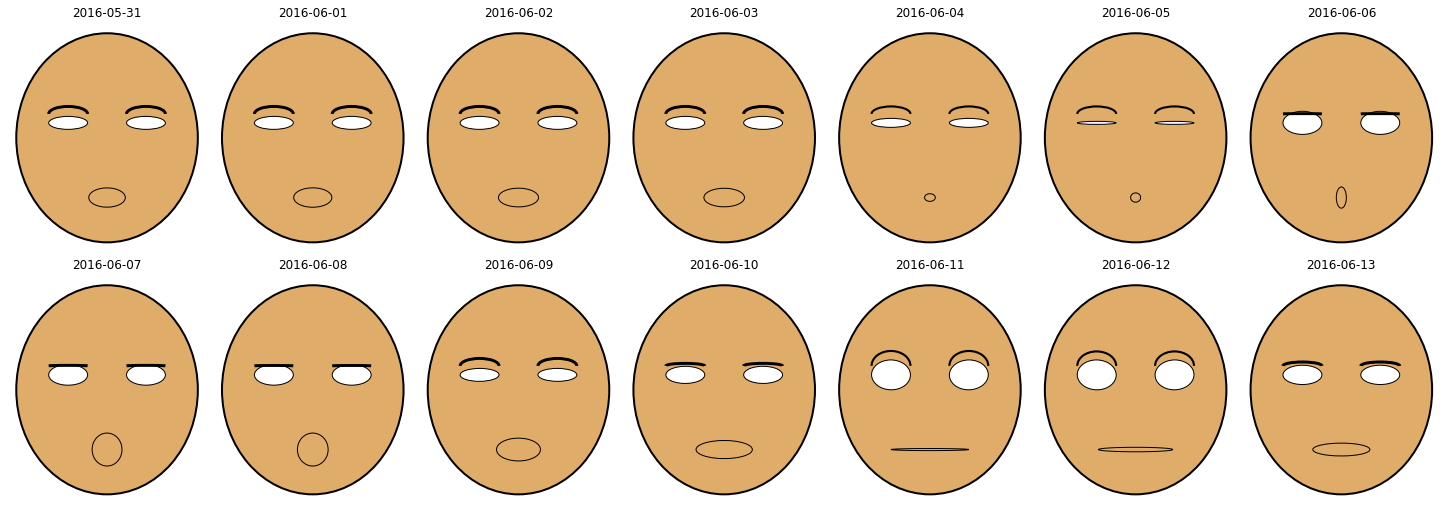

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, PathPatch, Arc, Polygon, Wedge
import matplotlib.path as mpath
from numpy.random import rand
from numpy import pi, arctan
from matplotlib.patches import Ellipse, PathPatch, Arc, Polygon, Wedge

Path = mpath.Path

class ChernoffFaces:
  DATA = {
    "height_of_mouth": None,
    "curvature_of_mouth": None,
    "width_of_mouth": None,
    "slant_of_eyes": None,
    "eccentricity_of_eyes": None,        
    "size_of_eyes": None,
    "pupil_size": None,
    "slant_of_eyebrows": None,
    "size_of_eyebrows": None,    
  }

  def __init__(
      self, 
      df, 
      labels=None, 
      filename='Chernoff-faces'
  ):
    if not labels:
      self.labels = df.iloc[:,0].values
      df = df[df.columns.drop(df.columns[0])]
    
    self.data = pd.DataFrame(
      min_max_scaler.fit_transform(df.values), 
      columns=df.columns
    )


    for index, key in enumerate(self.DATA.keys()):
      self.DATA[key] = self.data[self.data.columns[index % len(self.data.columns)]].values.tolist()


    self.filename = filename

  def cface(self, ax, index, title):

    height_of_mouth = self.DATA["height_of_mouth"][index]
    curvature_of_mouth = self.DATA["curvature_of_mouth"][index]
    width_of_mouth = self.DATA["width_of_mouth"][index]
    slant_of_eyes = self.DATA["slant_of_eyes"][index]
    eccentricity_of_eyes = self.DATA["eccentricity_of_eyes"][index]
    size_of_eyes = self.DATA["size_of_eyes"][index]
    pupil_size = self.DATA["pupil_size"][index]
    slant_of_eyebrows = self.DATA["slant_of_eyebrows"][index]
    size_of_eyebrows = self.DATA["size_of_eyebrows"][index]

    
    if height_of_mouth == 0:
          height_of_mouth = 0.1

    if curvature_of_mouth == 0:
          curvature_of_mouth = 0.1

    if width_of_mouth == 0:
          width_of_mouth = 0.1

    if slant_of_eyes == 0:
          slant_of_eyes = 0.1

    if eccentricity_of_eyes == 0:
          eccentricity_of_eyes = 0.1

    if size_of_eyes == 0:
          size_of_eyes = 0.1

    if slant_of_eyebrows == 0:
          slant_of_eyebrows = 0.5

    if size_of_eyebrows == 0:
          size_of_eyebrows = 0.1


    height, width = ax.bbox.height, ax.bbox.width
    face_width = width * 2/3
    face_height = height * 1.1
    self.UNIT_WIDTH = face_width / 7
    self.UNIT_HEIGHT = face_height / 7
    self.FACE_CENTER = [width / 2, height / 2]

    colour = 'white'

    # face
    ellipse = Ellipse(
      xy=self.FACE_CENTER,
      width=face_width,
      height=face_height,
      edgecolor='black',
      fc='#e0ac69',
      lw=2
    )
    ax.add_patch(ellipse)


    # eyes
    eye_width = self.UNIT_WIDTH * 1.5
    eye_height =  self.UNIT_HEIGHT * size_of_eyes

    eye_l_center = [sum(i) for i in zip(*[ 
      self.FACE_CENTER, 
      [-eye_width,  self.UNIT_HEIGHT / 2] 
    ])]

    eye_r_center = [sum(i) for i in zip(*[ 
      self.FACE_CENTER, 
      [eye_width,  self.UNIT_HEIGHT / 2] 
    ])]

    ellipse = Ellipse(
      xy=eye_l_center, 
      width=eye_width, 
      height=eye_height,
      angle=slant_of_eyes,
      edgecolor='black', 
      fc='white', 
      lw=1
    )
    ax.add_patch(ellipse)

    ellipse = Ellipse(
      xy=eye_r_center, 
      width=eye_width, 
      height=eye_height, 
      angle=-slant_of_eyes,
      edgecolor='black', 
      fc='white', 
      lw=1
    )
    ax.add_patch(ellipse)   


    # brows

    brow_width = self.UNIT_WIDTH * 1.5
    brow_height =  self.UNIT_HEIGHT * slant_of_eyebrows

    brow_l_center = [sum(i) for i in zip(*[ 
      self.FACE_CENTER, 
      [brow_width,  self.UNIT_HEIGHT * 0.8] 
    ])] 

    brow_r_center = [sum(i) for i in zip(*[ 
      self.FACE_CENTER, 
      [-brow_width,  self.UNIT_HEIGHT * 0.8] 
    ])]

    brow_l = Arc(
      xy=brow_l_center, 
      width=brow_width, 
      height=brow_height, 
      theta1=0, 
      theta2=180,
      edgecolor='black', 
      fc='None', 
      lw=2 + size_of_eyebrows
    )
    ax.add_patch(brow_l)

    brow_r = Arc(
      xy=brow_r_center, 
      width=brow_width, 
      height=brow_height, 
      theta1=0, 
      theta2=180,
      edgecolor='black', 
      fc='None', 
      lw=2 + size_of_eyebrows
    )
    ax.add_patch(brow_r)


    # mouth
    mouth_width = self.UNIT_WIDTH * 3 * width_of_mouth
    mouth_height = self.UNIT_HEIGHT * 1.5 * height_of_mouth
    mouth_center = [sum(i) for i in zip(*[ 
      self.FACE_CENTER, 
      [0,  -self.UNIT_HEIGHT * 2] 
    ])]

    mouth_height = min(mouth_height, 30)
    mouth_width = max(mouth_width, 5)

    arc = Arc(
        mouth_center,
        mouth_width,
        mouth_height,
    )
    ax.add_patch(arc)


    ax.title.set_text(f"{title}")

    ax.axis('off')
    ax.autoscale()

  def render(
      self,
      n_cols=1, 
      n_rows=1,
      figsize=(2, 2),
      empty_cols_ids=None
  ):
    fig, ax = plt.subplots(
      nrows=n_rows, 
      ncols=n_cols, 
      figsize=figsize, 
      sharey=True,
      sharex=True,
      constrained_layout=True,
      frameon=False,
    )

    axes = ax.flatten()

    j = 0
    for i in range(len(axes)):
        ax = axes[i]
        self.cface(ax, title=self.labels[j], index=j)
        j += 1

    
    plt.savefig(f"{self.filename}.png", bbox_inches="tight")
    plt.close()


c = ChernoffFaces(new_dataframe)
c.render(
  n_cols=7, 
  n_rows = 2,
  figsize=(20, 7),
  empty_cols_ids=[0, *np.arange(len(new_dataframe.index)+1, 21)]
)
img = Image("Chernoff-faces.png", width=1500)
img